# **Symbolic Regression with Genetic Programming**

In this notebook we will look at **Symbolic Regression with Genetic Programming**.

Do our imports.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import graphviz

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

Install **gplearn** library for Genetic Programming. It's usage is very similar to **scikit-learn** usage.

In [ ]:
!pip install gplearn

Import `SymbolicRegressor` for regression.

In [ ]:
from gplearn.genetic import SymbolicRegressor

Mount Google Drive so that we can load our dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the data.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab/auto-lpkm.tsv', sep='\t', header=0)
data

,id,cylinders,displacement,horsepower,weight_lbs,weight_kg,acceleration,model_year,color,more_info_1,more_info_2,more_info_3,more_info_4,more_info_5,l100km
0,0,4,98.0,79,2255,1023,17.7,76,1,94,91,49,97,68,9.0
1,1,4,113.0,95,2278,1033,15.5,72,4,97,58,66,85,38,9.8
2,2,8,351.0,153,4129,1873,13.0,72,1,41,8,15,83,70,16.8
3,3,4,97.0,88,2279,1034,19.0,73,2,53,3,42,2,82,11.8
4,4,6,199.0,97,2774,1258,15.5,70,0,74,53,24,51,53,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,4,91.0,67,1995,905,16.2,82,4,48,61,22,29,3,6.2
196,196,4,140.0,90,2408,1092,19.5,72,3,81,43,46,100,13,11.8
197,197,4,135.0,84,2370,1075,13.0,82,2,32,57,13,52,6,6.5
198,198,4,91.0,68,2025,918,18.2,82,4,55,88,70,53,54,6.4


The last column is the $y$, i.e., liters per 100 km which we must learn to predict.

In [ ]:
X = data.to_numpy()[:, 0:-1]
y = data.to_numpy()[:, -1]
data = data.drop('l100km', axis=1)
feature_names = data.columns.values

Scale the data. Then Symbolic Regression will perfom better.

In [ ]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

Build the regression model.

In [ ]:
# https://gplearn.readthedocs.io/en/stable/reference.html
# https://github.com/trevorstephens/gplearn/blob/main/doc/gp_examples.ipynb

model = SymbolicRegressor(population_size=200,    # number of individuals in a population
                          generations=20,         # number of iterations
                          init_depth=(2,6),       # min and max tree sizes for primordial soup
                          const_range=(-10,10),   # range of values for constants in a tree
                          metric='mse',           # measure to optimize for
                          function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'inv'),
                          stopping_criteria=0.01, # a little penalty for tree complexity
                          p_crossover=0.75,       # crossover probability
                          p_subtree_mutation=0.1, # subtree mutation probability
                          p_point_mutation=0.1,   # separate leaf mutation probability
                          max_samples=1,          # how many samples to use for training
                          feature_names=feature_names,
                          random_state=42,
                          verbose=1)
model.fit(X, y)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.87          94931.3        3           15.446              N/A      4.95s
   1     9.83          316.888        3           15.446              N/A      4.73s
   2     6.89           588.26       10          9.23746              N/A      4.40s
   3     4.79          56.2143       10           5.6046              N/A      4.09s
   4     7.85          109.574       12          3.59535              N/A      2.32s
   5    11.01          61.5157       20          3.22549              N/A      2.33s
   6    12.79          86.2937       18          3.08355              N/A      1.94s
   7    14.56          57.4538       16          3.08355              N/A      1.95s
   8    18.72          59.5184       31          3.05934              N/A  

SymbolicRegressor(const_range=(-10, 10),
                  feature_names=array(['id', 'cylinders', 'displacement', 'horsepower', 'weight_lbs',
       'weight_kg', 'acceleration', 'model_year', 'color', 'more_info_1',
       'more_info_2', 'more_info_3', 'more_info_4', 'more_info_5'],
      dtype=object),
                  function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'inv'),
                  max_samples=1, metric='mse', p_crossover=0.75,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  population_size=200, random_state=42, stopping_criteria=0.01,
                  verbose=1)

Print the built model.

In [ ]:
print(model._program)

inv(inv(add(add(inv(inv(add(sqrt(add(add(inv(inv(add(sqrt(sub(add(sqrt(sub(sub(weight_lbs, -3.757), -3.757)), sub(sub(horsepower, model_year), -3.757)), -3.757)), mul(sqrt(sub(sub(weight_lbs, -3.757), model_year)), sub(sub(weight_lbs, -3.757), -3.757))))), weight_kg), horsepower)), sub(sub(horsepower, -3.757), -3.757)))), weight_kg), weight_kg)))


Plot the built model.

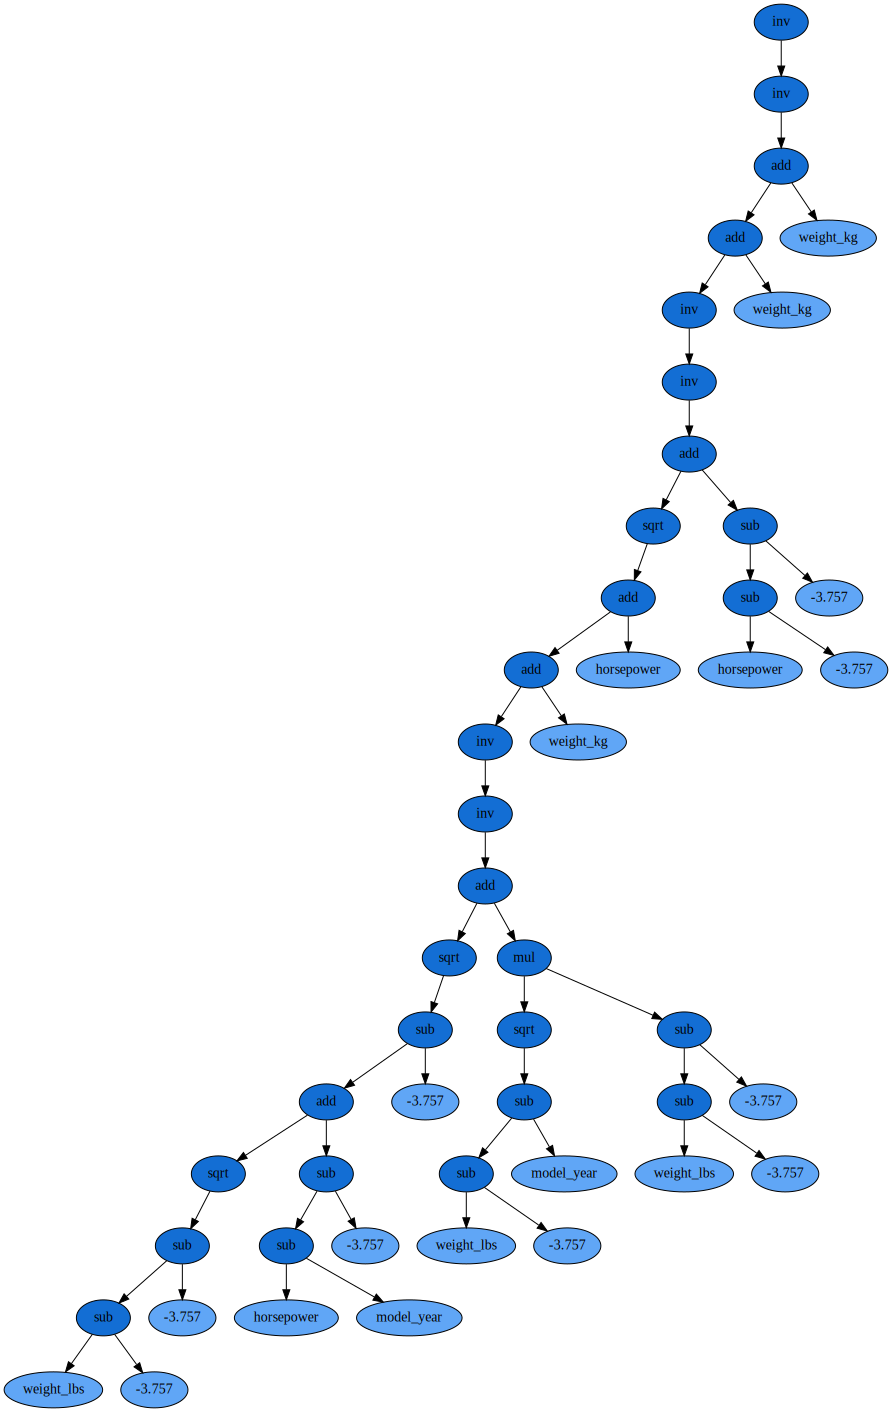

In [ ]:
dot_data = model._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph

Evaluate the algorithm using Cross-Validation.

In [ ]:
model = SymbolicRegressor(population_size=200,
                          generations=20,
                          init_depth=(2,6),
                          const_range=(-10,10),
                          metric='mse',
                          function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'inv'),
                          stopping_criteria=0.01,
                          p_crossover=0.75,
                          p_subtree_mutation=0.1,
                          p_point_mutation=0.1,
                          max_samples=1,
                          feature_names=feature_names,
                          random_state=42)

yHat = cross_val_predict(model, X, y, cv=10)

MSE = mean_squared_error(y, yHat)
R2 = r2_score(y, yHat)

print('Result with all features:')
print('MSE: %.3f' % MSE)
print('R^2: %.3f' % R2)

Result with all features:
MSE: 2.906
R^2: 0.802


---
*Notebook by Gints Jēkabsons*